## data Exploration

In [149]:
import pandas as pd
import matplotlib.pyplot as plt


In [150]:
df=pd.read_csv('dataset/ai_jobs.csv',encoding_errors='ignore')
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,salary,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,9356941.880,111392.16520,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,7878575.247,93792.56247,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,9002302.098,107170.26310,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,7814348.116,93027.95376,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,7371245.462,87752.92217,Yes,Decline


In [151]:
df.describe()

,salary,Salary_USD
count,5.000000e+02,500.000000
mean,7.662681e+06,91222.390973
std,1.722360e+06,20504.291452
min,2.685440e+06,31969.526350
25%,6.594967e+06,78511.514860
50%,7.727848e+06,91998.195285
75%,8.733588e+06,103971.282075
max,1.303763e+07,155209.821600


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   salary                 500 non-null    float64
 8   Salary_USD             500 non-null    float64
 9   Remote_Friendly        500 non-null    object 
 10  Job_Growth_Projection  500 non-null    object 
dtypes: float64(2), object(9)
memory usage: 43.1+ KB


In [153]:
#label encoding

# Standardize the values (remove extra spaces, handle capitalization)
df['Company_Size'] = df['Company_Size'].str.strip() 

# Define the mapping
company_size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}

df['Company_Size'] = df['Company_Size'].map(company_size_mapping)





In [154]:
df.tail()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,salary,Salary_USD,Remote_Friendly,Job_Growth_Projection
495,Data Scientist,Telecommunications,1,Berlin,Low,Medium,Machine Learning,8.888997e+06,105821.39400,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,0,London,Low,High,UX/UI Design,1.006278e+07,119794.99210,No,Decline
497,Cybersecurity Analyst,Energy,2,Dubai,High,Low,UX/UI Design,6.690174e+06,79644.93310,Yes,Stable
498,Operations Manager,Healthcare,2,Paris,High,Low,Python,6.521941e+06,77642.15063,Yes,Stable
499,HR Manager,Entertainment,1,Berlin,Medium,High,Project Management,5.776208e+06,68764.37892,Yes,Decline


In [155]:
print(df['AI_Adoption_Level'].unique())
print(df['Automation_Risk'].unique())
df[['AI_Adoption_Level', 'Automation_Risk']] = df[['AI_Adoption_Level', 'Automation_Risk']].apply(lambda x: x.str.strip().str.capitalize())


['Medium' 'Low' 'High']
['High' 'Low' 'Medium']


In [156]:
# Define mappings for the columns
label_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the mappings to both columns
df['AI_Adoption_Level'] = df['AI_Adoption_Level'].map(label_mapping)
df['Automation_Risk'] = df['Automation_Risk'].map(label_mapping)

# Verify the changes
print(df[['AI_Adoption_Level', 'Automation_Risk']].head())


   AI_Adoption_Level  Automation_Risk
0                  2                3
1                  2                3
2                  2                3
3                  1                3
4                  1                1


In [157]:
df['Remote_Friendly'] = df['Remote_Friendly'].map({'Yes': 1, 'No': 0})


In [158]:
df['Job_Growth_Projection'] = df['Job_Growth_Projection'].replace({
    'Growth': 1,
    'Decline': 0,
    'Stable': 0.5
})

C:\Users\chait\AppData\Local\Temp\ipykernel_10808\3045318752.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Job_Growth_Projection'] = df['Job_Growth_Projection'].replace({


In [159]:

df.head()


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,salary,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,0,Dubai,2,3,UX/UI Design,9356941.880,111392.16520,1,1.0
1,Marketing Specialist,Technology,2,Singapore,2,3,Marketing,7878575.247,93792.56247,0,0.0
2,AI Researcher,Technology,2,Singapore,2,3,UX/UI Design,9002302.098,107170.26310,1,1.0
3,Sales Manager,Retail,0,Berlin,1,3,Project Management,7814348.116,93027.95376,0,1.0
4,Cybersecurity Analyst,Entertainment,0,Tokyo,1,1,JavaScript,7371245.462,87752.92217,1,0.0


1) AI_Adoption_Level :- low-> 1 ,medium-> 2, high-> 3
2) Company_Size :- small -> 0 ,medium-> 1, large -> 2 
3) Automation_Risk :- small -> 1 ,medium-> 2, large -> 3


4) Remote_Friendly :- yes-> 1 NO-> 0
5) Job_Growth_Projection:-  decline -> 0 ,stable->0.5 ,growth -> 1

In [160]:
df = df.drop(columns=['Salary_USD'])


In [161]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,salary,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,0,Dubai,2,3,UX/UI Design,9356941.880,1,1.0
1,Marketing Specialist,Technology,2,Singapore,2,3,Marketing,7878575.247,0,0.0
2,AI Researcher,Technology,2,Singapore,2,3,UX/UI Design,9002302.098,1,1.0
3,Sales Manager,Retail,0,Berlin,1,3,Project Management,7814348.116,0,1.0
4,Cybersecurity Analyst,Entertainment,0,Tokyo,1,1,JavaScript,7371245.462,1,0.0


In [162]:
unique_values = {col: df[col].unique() for col in df.columns}
# Display unique values
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Unique values: {values}")
    print("-" * 30)

Column: Job_Title
Unique values: ['Cybersecurity Analyst' 'Marketing Specialist' 'AI Researcher'
 'Sales Manager' 'UX Designer' 'HR Manager' 'Product Manager'
 'Software Engineer' 'Data Scientist' 'Operations Manager']
------------------------------
Column: Industry
Unique values: ['Entertainment' 'Technology' 'Retail' 'Education' 'Finance'
 'Transportation' 'Telecommunications' 'Manufacturing' 'Healthcare'
 'Energy']
------------------------------
Column: Company_Size
Unique values: [0 2 1]
------------------------------
Column: Location
Unique values: ['Dubai' 'Singapore' 'Berlin' 'Tokyo' 'San Francisco' 'London' 'Paris'
 'Sydney' 'New York' 'Toronto']
------------------------------
Column: AI_Adoption_Level
Unique values: [2 1 3]
------------------------------
Column: Automation_Risk
Unique values: [3 1 2]
------------------------------
Column: Required_Skills
Unique values: ['UX/UI Design' 'Marketing' 'Project Management' 'JavaScript'
 'Cybersecurity' 'Sales' 'Machine Learning' 'Py

In [163]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,salary,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,0,Dubai,2,3,UX/UI Design,9356941.880,1,1.0
1,Marketing Specialist,Technology,2,Singapore,2,3,Marketing,7878575.247,0,0.0
2,AI Researcher,Technology,2,Singapore,2,3,UX/UI Design,9002302.098,1,1.0
3,Sales Manager,Retail,0,Berlin,1,3,Project Management,7814348.116,0,1.0
4,Cybersecurity Analyst,Entertainment,0,Tokyo,1,1,JavaScript,7371245.462,1,0.0


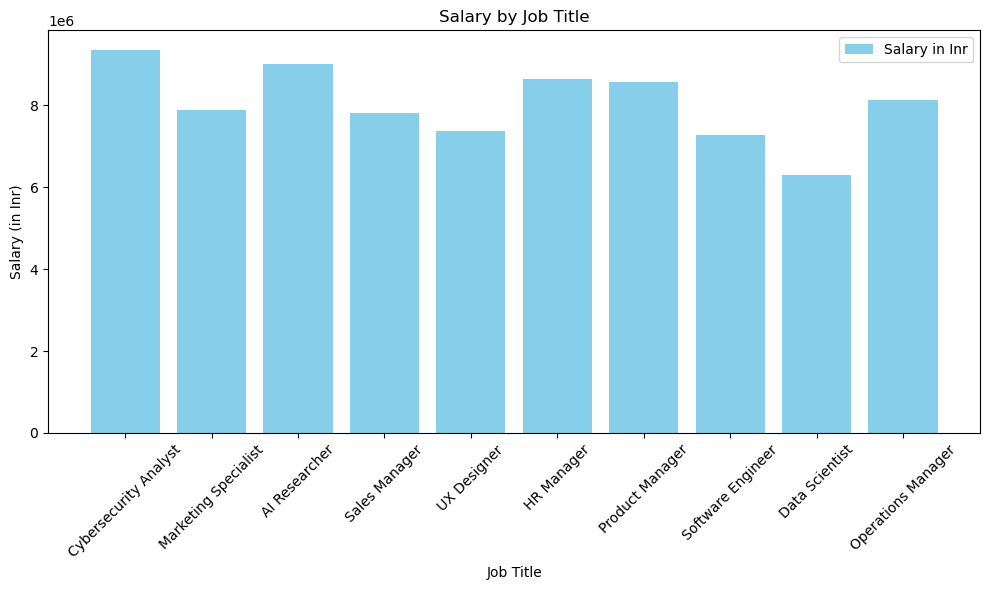

In [164]:
job_titles = ai_job_dataset['Job_Title']
salaries = ai_job_dataset['Salary']

plt.figure(figsize=(10, 6))
plt.bar(job_titles, salaries, color='skyblue', label='Salary in Inr') 
plt.xlabel('Job Title')
plt.ylabel('Salary (in Inr)')
plt.title('Salary by Job Title')
plt.xticks(rotation=45)

plt.legend() 


plt.tight_layout()
plt.show()

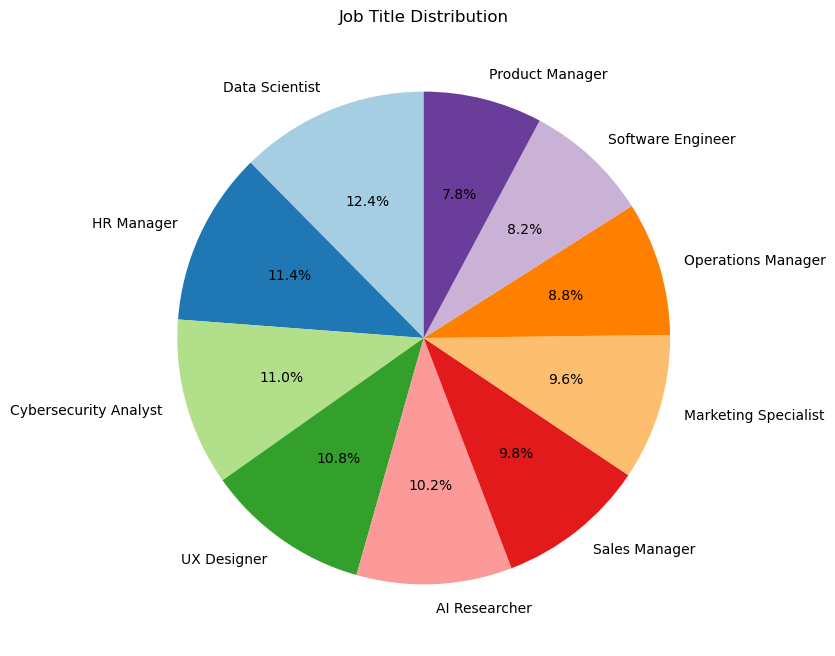

In [165]:


job_title_counts = df['Job_Title'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
job_title_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=job_title_counts.index, colors=plt.cm.Paired.colors)
plt.title('Job Title Distribution')
plt.ylabel('')  
plt.show()


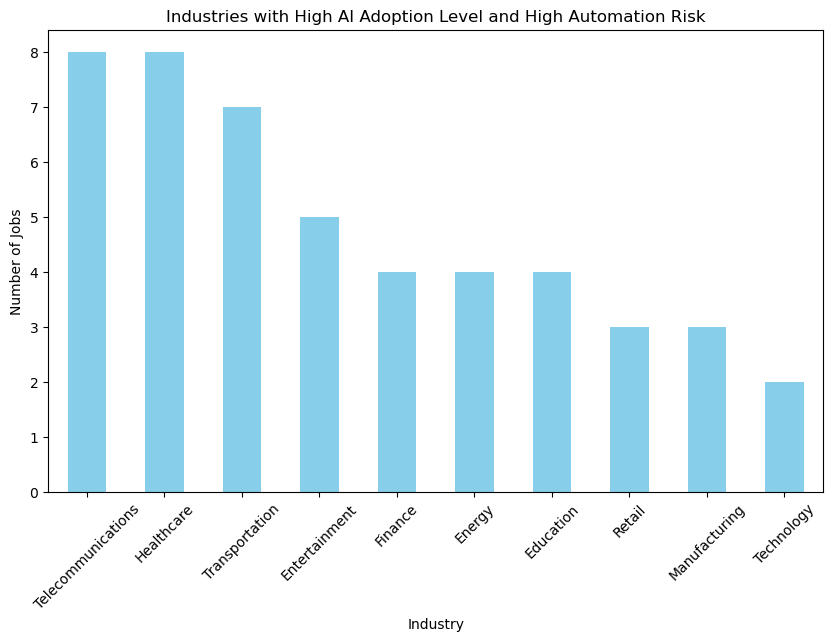

In [166]:
filtered_df = df[(df['AI_Adoption_Level'] == 3) & (df['Automation_Risk'] == 3)]

industry_counts = filtered_df['Industry'].value_counts()


plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Industries with High AI Adoption Level and High Automation Risk')
plt.xlabel('Industry')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()


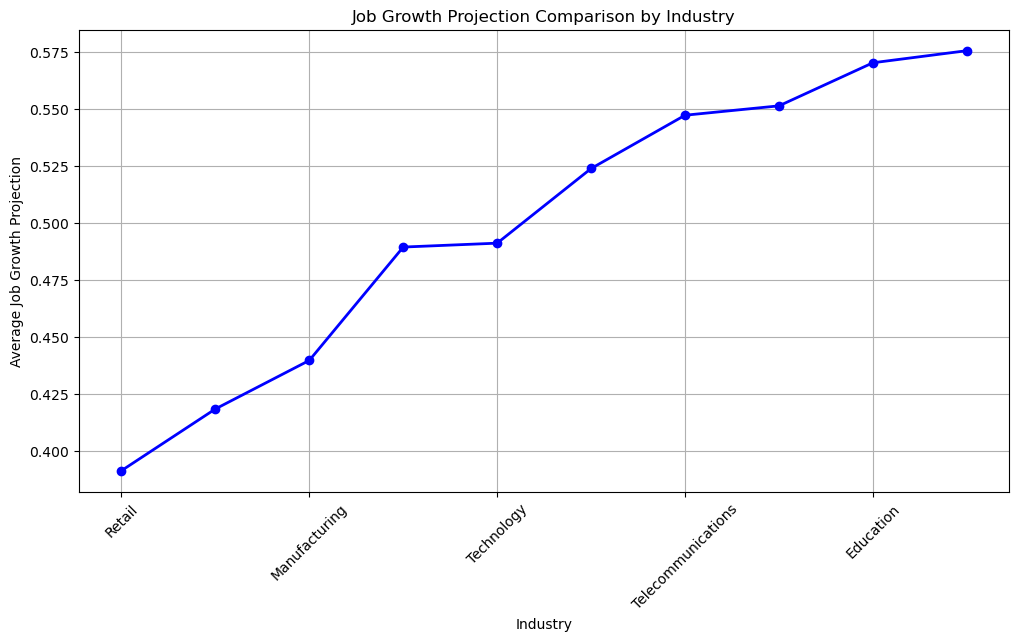

In [167]:
industry_growth = df.groupby('Industry')['Job_Growth_Projection'].mean()
industry_growth_sorted = industry_growth.sort_values()

# Plotting the line chart
plt.figure(figsize=(12, 6))
industry_growth_sorted.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Job Growth Projection Comparison by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Job Growth Projection')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


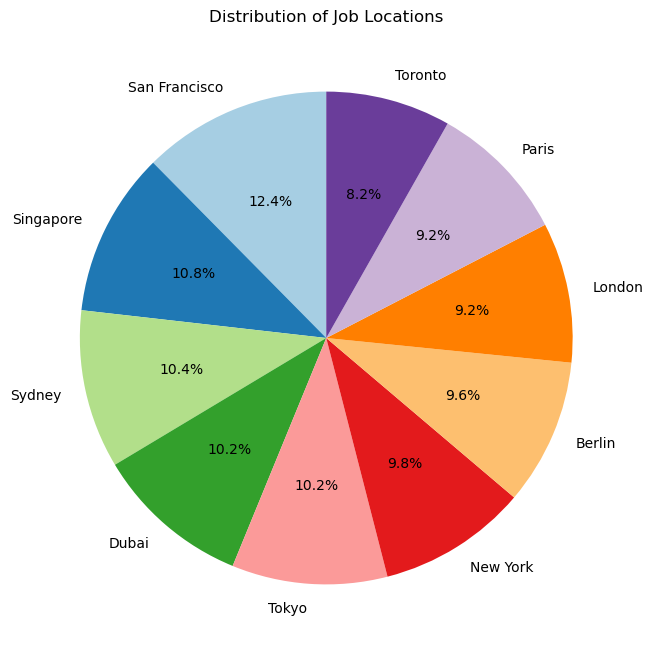

In [168]:
location_counts = df['Location'].value_counts()

# pie chart
plt.figure(figsize=(8,8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Job Locations')
plt.show()


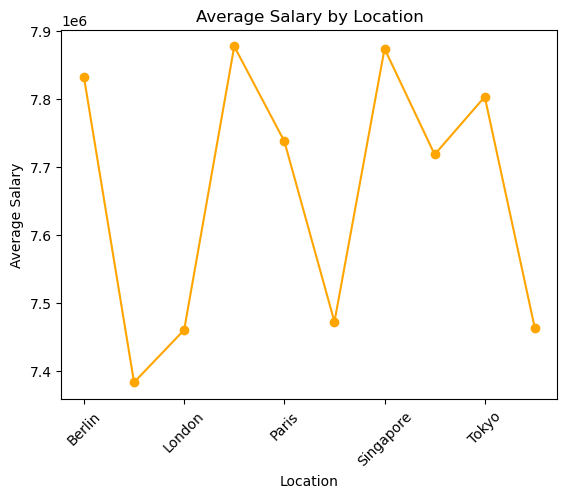

In [169]:
df.groupby('Location')['salary'].mean().plot(kind='line', color='orange', marker='o')
plt.title('Average Salary by Location')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


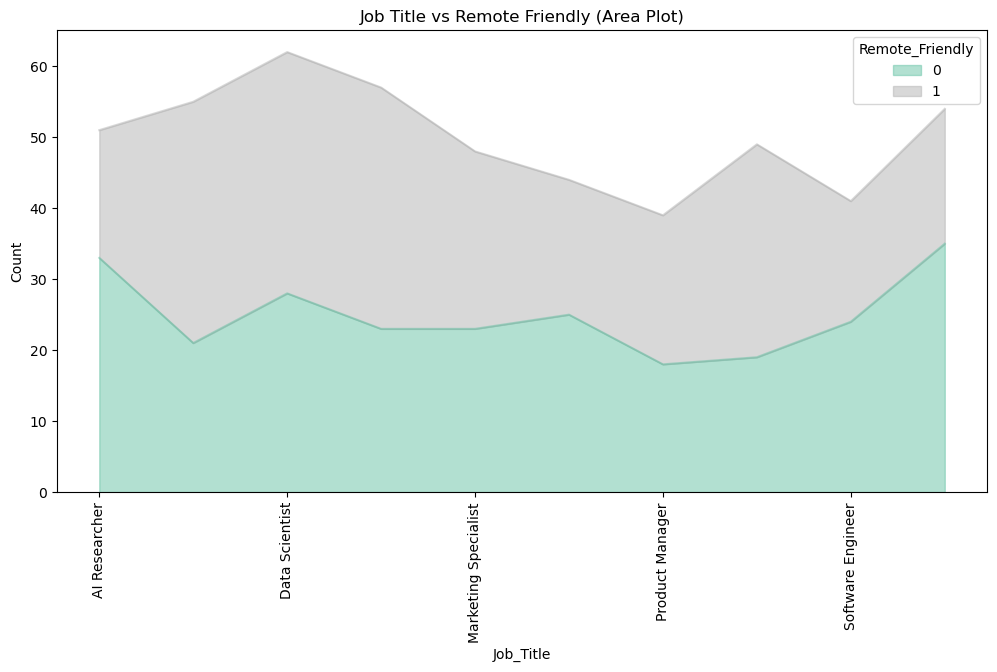

In [170]:
import matplotlib.pyplot as plt

# Pivot the data to get counts of remote-friendly categories for each job title
pivot_df = df.pivot_table(index='Job_Title', columns='Remote_Friendly', aggfunc='size', fill_value=0)

# Plotting an area plot
pivot_df.plot(kind='area', figsize=(12,6), alpha=0.5, cmap='Set2')

# Set the title and labels
plt.title('Job Title vs Remote Friendly (Area Plot)')
plt.xlabel('Job_Title')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


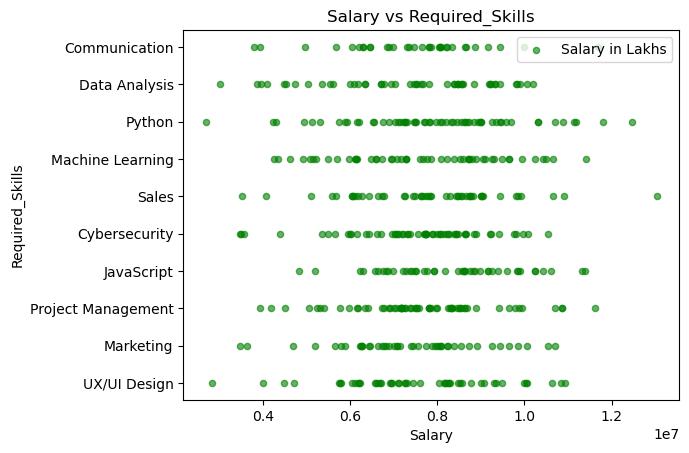

In [171]:
df.plot(kind='scatter', x='salary', y='Required_Skills', color='green', alpha=0.6)

plt.title('Salary vs Required_Skills')
plt.xlabel('Salary')
plt.ylabel('Required_Skills')

plt.legend(['Salary in Lakhs'], loc='upper right')
plt.show()



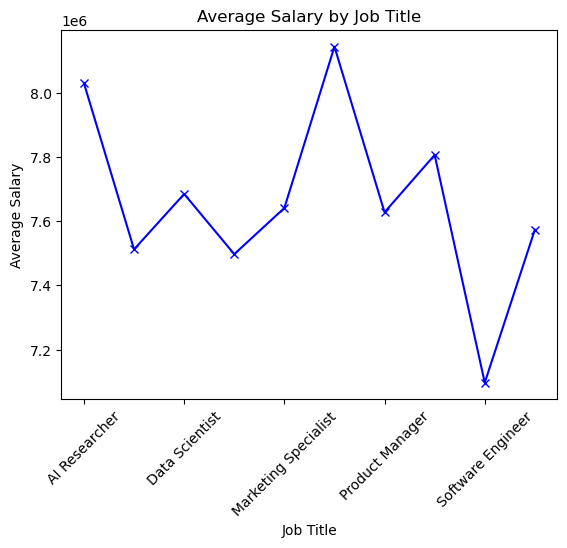

In [172]:
df.groupby('Job_Title')['salary'].mean().plot(kind='line', color='blue', marker='x')
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()
